<a href="https://colab.research.google.com/github/justin66744/beats-customer-insights-project/blob/main/Correlation_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_dataset.csv')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,short_name,brand
0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,1MORE ComfoBuds,1MORE
1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,1MORE ComfoBuds,1MORE
2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,1MORE ComfoBuds,1MORE
3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,1MORE ComfoBuds,1MORE
4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,1MORE ComfoBuds,1MORE


In [3]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

correlation_matrix

,rating,is_verified,helpful_count
rating,1.000000,-0.006945,0.023274
is_verified,-0.006945,1.000000,0.004931
helpful_count,0.023274,0.004931,1.000000


In [4]:
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print(significant_correlations)

               rating  is_verified  helpful_count
rating            1.0          NaN            NaN
is_verified       NaN          1.0            NaN
helpful_count     NaN          NaN            1.0


## Correlation Visualizations

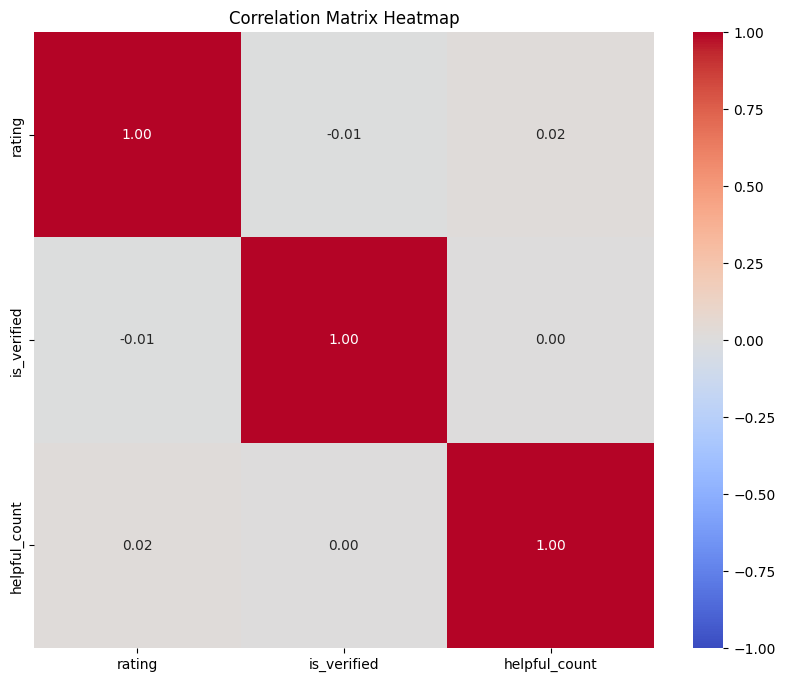

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

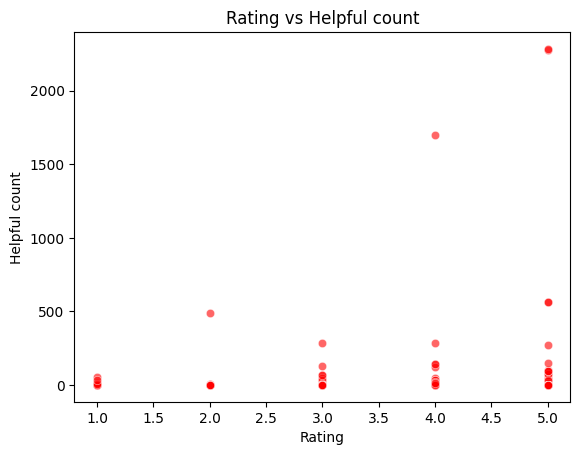

In [6]:
sns.scatterplot(x='rating', y='helpful_count', data=df, alpha=0.6, color='red')
plt.title("Rating vs Helpful count")
plt.xlabel("Rating")
plt.ylabel("Helpful count")
plt.show()


In [8]:
correlation = df['rating'].corr(df['is_verified'])
correlation2 = df['rating'].corr(df['helpful_count'])
print(f"Correlation between rating and verified: {correlation:.2f}")
print(f"Correlation between rating and helpful count: {correlation2:.2f}")

Correlation between rating and verified: -0.01
Correlation between rating and helpful count: 0.02
